In [293]:
import pandas as pd
import numpy as np

In [294]:
df = pd.read_excel('state_month_overdose.xlsx')

In [295]:
df.head()

,State,State Code,Month,Month Code,Deaths,Population,Crude Rate
0,Alabama,1,"Jan., 2015",2015/01,29,Not Applicable,Not Applicable
1,Alabama,1,"Feb., 2015",2015/02,24,Not Applicable,Not Applicable
2,Alabama,1,"Mar., 2015",2015/03,37,Not Applicable,Not Applicable
3,Alabama,1,"Apr., 2015",2015/04,29,Not Applicable,Not Applicable
4,Alabama,1,"May, 2015",2015/05,21,Not Applicable,Not Applicable


In [296]:
df.dtypes

State         object
State Code     int64
Month         object
Month Code    object
Deaths        object
Population    object
Crude Rate    object
dtype: object

In [297]:
df.isna().sum() #no null values

State         0
State Code    0
Month         0
Month Code    0
Deaths        0
Population    0
Crude Rate    0
dtype: int64

In [298]:
df['Deaths'] = df['Deaths'].apply(lambda x: 0 if x == 'Suppressed' else int(x))

In [299]:
df.head()

,State,State Code,Month,Month Code,Deaths,Population,Crude Rate
0,Alabama,1,"Jan., 2015",2015/01,29,Not Applicable,Not Applicable
1,Alabama,1,"Feb., 2015",2015/02,24,Not Applicable,Not Applicable
2,Alabama,1,"Mar., 2015",2015/03,37,Not Applicable,Not Applicable
3,Alabama,1,"Apr., 2015",2015/04,29,Not Applicable,Not Applicable
4,Alabama,1,"May, 2015",2015/05,21,Not Applicable,Not Applicable


In [300]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

/tmp/ipykernel_1273/3903996341.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


In [301]:
df = df.reset_index()
df

,Month,State,State Code,Month Code,Deaths,Population,Crude Rate
0,2015-01-01,Alabama,1,2015/01,29,Not Applicable,Not Applicable
1,2015-02-01,Alabama,1,2015/02,24,Not Applicable,Not Applicable
2,2015-03-01,Alabama,1,2015/03,37,Not Applicable,Not Applicable
3,2015-04-01,Alabama,1,2015/04,29,Not Applicable,Not Applicable
4,2015-05-01,Alabama,1,2015/05,21,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...
3667,2020-08-01,Wyoming,56,2020/08,0,Not Applicable,Not Applicable
3668,2020-09-01,Wyoming,56,2020/09,0,Not Applicable,Not Applicable
3669,2020-10-01,Wyoming,56,2020/10,0,Not Applicable,Not Applicable
3670,2020-11-01,Wyoming,56,2020/11,0,Not Applicable,Not Applicable


In [302]:
df['Month Code'] = pd.to_datetime(df['Month Code'])#.reset_index()
# df.set_index('Month', inplace=True)
df

/tmp/ipykernel_1273/96040416.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month Code'] = pd.to_datetime(df['Month Code'])#.reset_index()


,Month,State,State Code,Month Code,Deaths,Population,Crude Rate
0,2015-01-01,Alabama,1,2015-01-01,29,Not Applicable,Not Applicable
1,2015-02-01,Alabama,1,2015-02-01,24,Not Applicable,Not Applicable
2,2015-03-01,Alabama,1,2015-03-01,37,Not Applicable,Not Applicable
3,2015-04-01,Alabama,1,2015-04-01,29,Not Applicable,Not Applicable
4,2015-05-01,Alabama,1,2015-05-01,21,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...
3667,2020-08-01,Wyoming,56,2020-08-01,0,Not Applicable,Not Applicable
3668,2020-09-01,Wyoming,56,2020-09-01,0,Not Applicable,Not Applicable
3669,2020-10-01,Wyoming,56,2020-10-01,0,Not Applicable,Not Applicable
3670,2020-11-01,Wyoming,56,2020-11-01,0,Not Applicable,Not Applicable


In [303]:
df[df['Month'] == df['Month Code']]

,Month,State,State Code,Month Code,Deaths,Population,Crude Rate
0,2015-01-01,Alabama,1,2015-01-01,29,Not Applicable,Not Applicable
1,2015-02-01,Alabama,1,2015-02-01,24,Not Applicable,Not Applicable
2,2015-03-01,Alabama,1,2015-03-01,37,Not Applicable,Not Applicable
3,2015-04-01,Alabama,1,2015-04-01,29,Not Applicable,Not Applicable
4,2015-05-01,Alabama,1,2015-05-01,21,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...
3667,2020-08-01,Wyoming,56,2020-08-01,0,Not Applicable,Not Applicable
3668,2020-09-01,Wyoming,56,2020-09-01,0,Not Applicable,Not Applicable
3669,2020-10-01,Wyoming,56,2020-10-01,0,Not Applicable,Not Applicable
3670,2020-11-01,Wyoming,56,2020-11-01,0,Not Applicable,Not Applicable


In [304]:
df = df.groupby(['Month']).agg({'Deaths': 'sum'}).reset_index()
df

,Month,Deaths
0,2015-01-01,2771
1,2015-02-01,2627
2,2015-03-01,2907
3,2015-04-01,2822
4,2015-05-01,2850
...,...,...
67,2020-08-01,6165
68,2020-09-01,5683
69,2020-10-01,5613
70,2020-11-01,5613


In [305]:
for row in range(df.shape[0]):
    print(df.iloc[row])

Month     2015-01-01 00:00:00
Deaths                   2771
Name: 0, dtype: object
Month     2015-02-01 00:00:00
Deaths                   2627
Name: 1, dtype: object
Month     2015-03-01 00:00:00
Deaths                   2907
Name: 2, dtype: object
Month     2015-04-01 00:00:00
Deaths                   2822
Name: 3, dtype: object
Month     2015-05-01 00:00:00
Deaths                   2850
Name: 4, dtype: object
Month     2015-06-01 00:00:00
Deaths                   2634
Name: 5, dtype: object
Month     2015-07-01 00:00:00
Deaths                   2734
Name: 6, dtype: object
Month     2015-08-01 00:00:00
Deaths                   2810
Name: 7, dtype: object
Month     2015-09-01 00:00:00
Deaths                   2925
Name: 8, dtype: object
Month     2015-10-01 00:00:00
Deaths                   2970
Name: 9, dtype: object
Month     2015-11-01 00:00:00
Deaths                   2739
Name: 10, dtype: object
Month     2015-12-01 00:00:00
Deaths                   2718
Name: 11, dtype: object
Mo

In [306]:
df[df['Month'] == '2020-02-01']

,Month,Deaths
61,2020-02-01,4696


In [307]:
df.dtypes

Month     datetime64[ns]
Deaths             int64
dtype: object

In [308]:
# df['Deaths'] = df['Deaths'].astype('float32')

In [378]:
train = df[df['Month'] <= '2020-02-01']
test = df[df['Month'] >= '2020-02-01']
testog = test
test = test.reset_index().drop(columns = ['index'])

In [379]:
train

,Month,Deaths
0,2015-01-01,2771
1,2015-02-01,2627
2,2015-03-01,2907
3,2015-04-01,2822
4,2015-05-01,2850
...,...,...
57,2019-10-01,4529
58,2019-11-01,4560
59,2019-12-01,4645
60,2020-01-01,4727


In [380]:
test

,Month,Deaths
0,2020-02-01,4696
1,2020-03-01,5365
2,2020-04-01,6027
3,2020-05-01,7419
4,2020-06-01,6307
5,2020-07-01,6343
6,2020-08-01,6165
7,2020-09-01,5683
8,2020-10-01,5613
9,2020-11-01,5613


In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

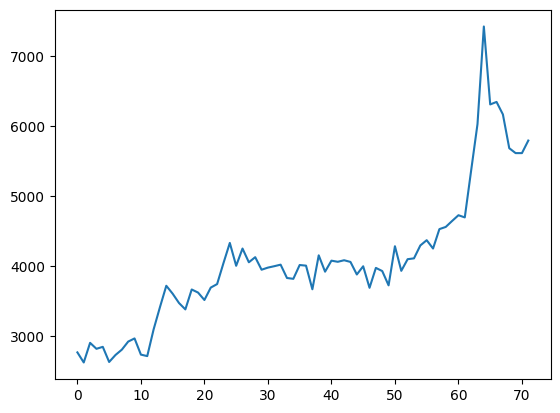

In [382]:
plt.plot(df['Deaths'])

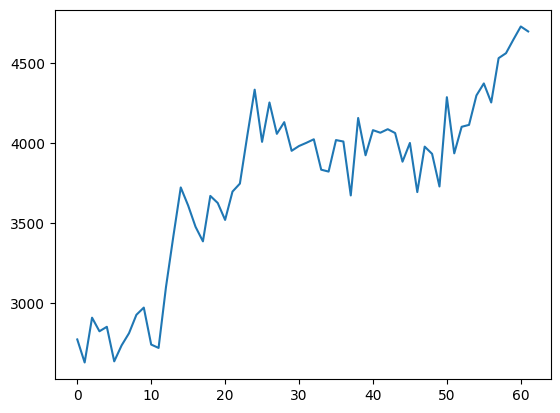

In [383]:
plt.plot(train['Deaths'])

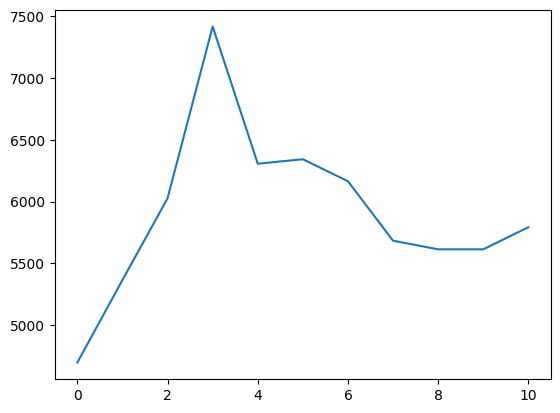

In [384]:
plt.plot(test['Deaths'])

In [385]:
import tensorflow as tf

In [386]:
# tf.random.set_seed(7)

In [387]:
df.values

array([[Timestamp('2015-01-01 00:00:00'), 2771],
       [Timestamp('2015-02-01 00:00:00'), 2627],
       [Timestamp('2015-03-01 00:00:00'), 2907],
       [Timestamp('2015-04-01 00:00:00'), 2822],
       [Timestamp('2015-05-01 00:00:00'), 2850],
       [Timestamp('2015-06-01 00:00:00'), 2634],
       [Timestamp('2015-07-01 00:00:00'), 2734],
       [Timestamp('2015-08-01 00:00:00'), 2810],
       [Timestamp('2015-09-01 00:00:00'), 2925],
       [Timestamp('2015-10-01 00:00:00'), 2970],
       [Timestamp('2015-11-01 00:00:00'), 2739],
       [Timestamp('2015-12-01 00:00:00'), 2718],
       [Timestamp('2016-01-01 00:00:00'), 3098],
       [Timestamp('2016-02-01 00:00:00'), 3416],
       [Timestamp('2016-03-01 00:00:00'), 3721],
       [Timestamp('2016-04-01 00:00:00'), 3608],
       [Timestamp('2016-05-01 00:00:00'), 3475],
       [Timestamp('2016-06-01 00:00:00'), 3384],
       [Timestamp('2016-07-01 00:00:00'), 3668],
       [Timestamp('2016-08-01 00:00:00'), 3624],
       [Timestamp('2

In [388]:
# #With normalization
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(df)

In [389]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset.iloc[i:(i+look_back)] #, 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back])#, 0])
	return np.array(dataX), np.array(dataY)

In [390]:
look_back = 1
trainX, trainY = create_dataset(train['Deaths'], look_back)
testX, testY = create_dataset(test['Deaths'], look_back)

In [391]:
len(train)

62

In [392]:
len(trainX)

61

In [393]:
len(trainY)

61

In [394]:
testX

array([[4696],
       [5365],
       [6027],
       [7419],
       [6307],
       [6343],
       [6165],
       [5683],
       [5613],
       [5613]])

In [395]:
for i in range(len(trainX)):
    print(trainX[i], trainY[i])

[2771] 2627
[2627] 2907
[2907] 2822
[2822] 2850
[2850] 2634
[2634] 2734
[2734] 2810
[2810] 2925
[2925] 2970
[2970] 2739
[2739] 2718
[2718] 3098
[3098] 3416
[3416] 3721
[3721] 3608
[3608] 3475
[3475] 3384
[3384] 3668
[3668] 3624
[3624] 3518
[3518] 3695
[3695] 3745
[3745] 4044
[4044] 4332
[4332] 4006
[4006] 4252
[4252] 4056
[4056] 4129
[4129] 3950
[3950] 3980
[3980] 4000
[4000] 4022
[4022] 3832
[3832] 3820
[3820] 4017
[4017] 4008
[4008] 3671
[3671] 4155
[4155] 3922
[3922] 4079
[4079] 4063
[4063] 4085
[4085] 4061
[4061] 3882
[3882] 3999
[3999] 3692
[3692] 3976
[3976] 3931
[3931] 3727
[3727] 4285
[4285] 3934
[3934] 4100
[4100] 4112
[4112] 4296
[4296] 4371
[4371] 4252
[4252] 4529
[4529] 4560
[4560] 4645
[4645] 4727
[4727] 4696


In [363]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100


/home/sukikrishna/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 13314687.0000
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10649589.0000
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7598318.5000
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4407593.0000
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1893722.6250
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 579256.7500
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154995.5469
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67434.1250
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52905.2969
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50317.6719
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49837.8828
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49784.4766
Epoch 13/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49813.6016
Epoch 14/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49856.0391
Epoch 15/100


In [396]:
trainPredict = model.predict(trainX)
testPredictog = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [397]:
trainPredict

array([[2783.9817],
       [2639.382 ],
       [2920.5479],
       [2835.194 ],
       [2863.3105],
       [2646.4114],
       [2746.8276],
       [2823.1438],
       [2938.6228],
       [2983.81  ],
       [2751.8484],
       [2730.761 ],
       [3112.343 ],
       [3431.6667],
       [3737.9368],
       [3624.4663],
       [3490.9124],
       [3399.5337],
       [3684.716 ],
       [3640.533 ],
       [3534.0916],
       [3711.8284],
       [3762.0366],
       [4062.2815],
       [4351.48  ],
       [4024.1233],
       [4271.147 ],
       [4074.3315],
       [4147.6353],
       [3967.89  ],
       [3998.015 ],
       [4018.0984],
       [4040.1897],
       [3849.399 ],
       [3837.3489],
       [4035.169 ],
       [4026.1316],
       [3687.7285],
       [4173.743 ],
       [3939.7734],
       [4097.427 ],
       [4081.3606],
       [4103.4517],
       [4079.3523],
       [3899.607 ],
       [4017.094 ],
       [3708.8157],
       [3993.9983],
       [3948.8108],
       [3743.9617],


In [398]:
len(trainX), len(trainPredict)

(61, 61)

In [399]:
testX

array([[4696],
       [5365],
       [6027],
       [7419],
       [6307],
       [6343],
       [6165],
       [5683],
       [5613],
       [5613]])

In [400]:
testPredictog

array([[4716.9956],
       [5388.7803],
       [6053.5366],
       [7451.332 ],
       [6334.7026],
       [6370.852 ],
       [6192.111 ],
       [5708.1045],
       [5637.813 ],
       [5637.813 ]], dtype=float32)

In [401]:
#GETTING ACTUAL TEST PREDICTIONS
def generate_forecast(model, initial_sequence, num_predictions=12):
    predictions = []
    for_model = initial_sequence
    
    for _ in range(num_predictions):
        # Generate the next prediction
        for_model = model.predict(for_model)
        predictions.append(for_model[0][0])

    return np.array(predictions)

In [402]:
initial_sequence = np.array([trainPredict[-1]])
initial_sequence

array([[4748.1245]], dtype=float32)

In [403]:
model.predict(initial_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


array([[4769.337]], dtype=float32)

In [404]:
testPredict = generate_forecast(model, initial_sequence, num_predictions=10)
print(testPredict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[4769.337  4790.6377 4812.027  4833.5054 4855.073  4876.731  4898.4785
 4920.317  4942.246  4964.267 ]


In [405]:
testX

array([[4696],
       [5365],
       [6027],
       [7419],
       [6307],
       [6343],
       [6165],
       [5683],
       [5613],
       [5613]])

In [406]:
testPredict

array([4769.337 , 4790.6377, 4812.027 , 4833.5054, 4855.073 , 4876.731 ,
       4898.4785, 4920.317 , 4942.246 , 4964.267 ], dtype=float32)

In [407]:
len(trainPredict)

61

In [408]:
len(testPredict)

10

In [410]:
df

,Month,Deaths
0,2015-01-01,2771
1,2015-02-01,2627
2,2015-03-01,2907
3,2015-04-01,2822
4,2015-05-01,2850
...,...,...
67,2020-08-01,6165
68,2020-09-01,5683
69,2020-10-01,5613
70,2020-11-01,5613


plotting from 2/2015 onwards

In [411]:
len(trainPredict)

61

In [412]:
len(testPredict)

10

In [413]:
zero = np.array([[0]])

In [414]:
trainPredictlst = trainPredict.flatten().tolist()

In [415]:
len(trainPredictlst)

61

In [416]:
testPredictlst = testPredict.flatten().tolist()

In [417]:
len(testPredictlst)

10

In [418]:
combined_array = [0] + trainPredictlst + testPredictlst

In [419]:
len(combined_array)

72

In [420]:
df

,Month,Deaths
0,2015-01-01,2771
1,2015-02-01,2627
2,2015-03-01,2907
3,2015-04-01,2822
4,2015-05-01,2850
...,...,...
67,2020-08-01,6165
68,2020-09-01,5683
69,2020-10-01,5613
70,2020-11-01,5613


In [436]:
df['LSTM Predictions'] = combined_array

In [437]:
df

,Month,Deaths,LSTM Predictions,SARIMA Predictions
0,2015-01-01,2771,0.000000,0.000000
1,2015-02-01,2627,2783.981689,2540.838172
2,2015-03-01,2907,2639.382080,2673.336257
3,2015-04-01,2822,2920.547852,2865.711655
4,2015-05-01,2850,2835.194092,2837.851862
...,...,...,...,...
67,2020-08-01,6165,4876.730957,5041.705897
68,2020-09-01,5683,4898.478516,4958.628025
69,2020-10-01,5613,4920.316895,5086.221253
70,2020-11-01,5613,4942.246094,5029.753481


In [425]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [426]:
train

,Month,Deaths
0,2015-01-01,2771
1,2015-02-01,2627
2,2015-03-01,2907
3,2015-04-01,2822
4,2015-05-01,2850
...,...,...
57,2019-10-01,4529
58,2019-11-01,4560
59,2019-12-01,4645
60,2020-01-01,4727


In [427]:
sarima_model = SARIMAX(train['Deaths'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

In [428]:
sarima_predictions = sarima_result.predict(start=0, end=len(train) + len(test) - 1, dynamic=False)

In [429]:
len(sarima_predictions)

73

In [430]:
sarima_predictions

0        0.000000
1     2540.838172
2     2673.336257
3     2865.711655
4     2837.851862
         ...     
68    4958.628025
69    5086.221253
70    5029.753481
71    5205.366131
72    5287.342828
Name: predicted_mean, Length: 73, dtype: float64

In [432]:
df['SARIMA Predictions'] = sarima_predictions

In [440]:
df

,Month,Deaths,LSTM Predictions,SARIMA Predictions
0,2015-01-01,2771,0.000000,0.000000
1,2015-02-01,2627,2783.981689,2540.838172
2,2015-03-01,2907,2639.382080,2673.336257
3,2015-04-01,2822,2920.547852,2865.711655
4,2015-05-01,2850,2835.194092,2837.851862
...,...,...,...,...
67,2020-08-01,6165,4876.730957,5041.705897
68,2020-09-01,5683,4898.478516,4958.628025
69,2020-10-01,5613,4920.316895,5086.221253
70,2020-11-01,5613,4942.246094,5029.753481


In [441]:
df.to_csv('predictionresults.csv')

In [442]:
plottable = df.iloc[1:]

In [443]:
plottable

,Month,Deaths,LSTM Predictions,SARIMA Predictions
1,2015-02-01,2627,2783.981689,2540.838172
2,2015-03-01,2907,2639.382080,2673.336257
3,2015-04-01,2822,2920.547852,2865.711655
4,2015-05-01,2850,2835.194092,2837.851862
5,2015-06-01,2634,2863.310547,2844.503804
...,...,...,...,...
67,2020-08-01,6165,4876.730957,5041.705897
68,2020-09-01,5683,4898.478516,4958.628025
69,2020-10-01,5613,4920.316895,5086.221253
70,2020-11-01,5613,4942.246094,5029.753481


In [444]:
plottable.set_index('Month', inplace=True)

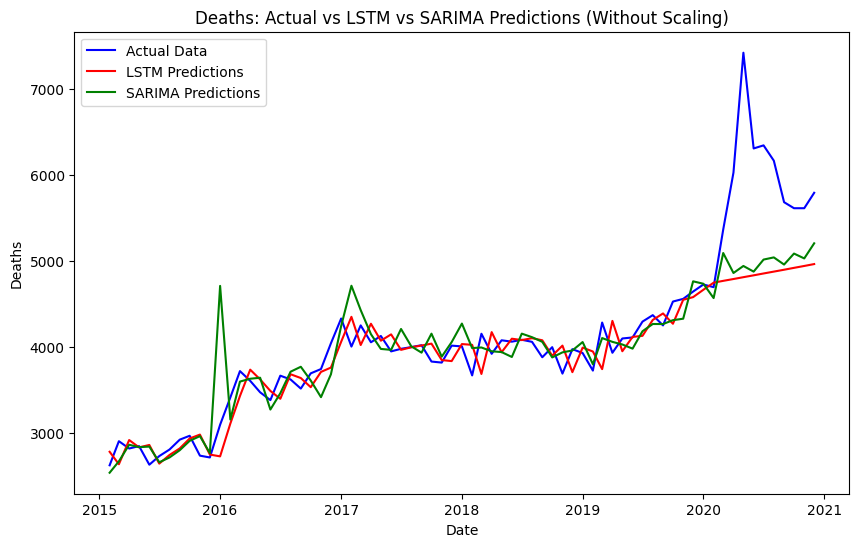

In [445]:
plt.figure(figsize=(10, 6))
plt.plot(plottable.index, plottable['Deaths'], label='Actual Data', color='blue')
plt.plot(plottable.index, plottable['LSTM Predictions'], label='LSTM Predictions', color='red')
plt.plot(plottable.index, plottable['SARIMA Predictions'], label='SARIMA Predictions', color='green')
plt.title('Deaths: Actual vs LSTM vs SARIMA Predictions (Without Scaling)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [446]:
plottable.index[61:]

DatetimeIndex(['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

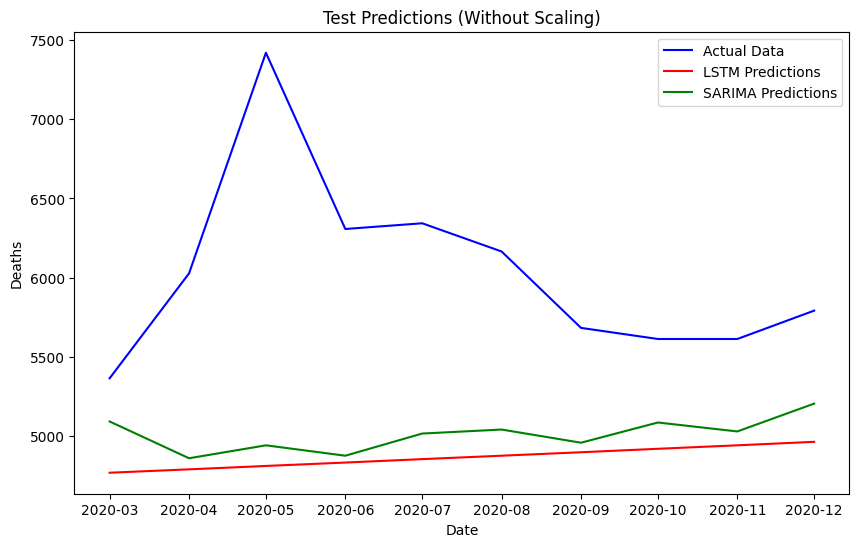

In [447]:
plt.figure(figsize=(10, 6))
plt.plot(plottable.index[61:], plottable['Deaths'][61:], label='Actual Data', color='blue')
plt.plot(plottable.index[61:], plottable['LSTM Predictions'][61:], label='LSTM Predictions', color='red')
plt.plot(plottable.index[61:], plottable['SARIMA Predictions'][61:], label='SARIMA Predictions', color='green')
plt.title('Test Predictions (Without Scaling)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [289]:
trainPredict

array([[2784.187 ],
       [2639.5796],
       [2920.7603],
       [2835.4019],
       [2863.52  ],
       [2646.6091],
       [2747.031 ],
       [2823.3516],
       [2938.8364],
       [2984.026 ],
       [2752.0518],
       [2730.9634],
       [3112.5657],
       [3431.9067],
       [3738.1929],
       [3624.716 ],
       [3491.1553],
       [3399.7715],
       [3684.9692],
       [3640.7837],
       [3534.337 ],
       [3712.083 ],
       [3762.294 ],
       [4062.5547],
       [4351.769 ],
       [4024.3945],
       [4271.4316],
       [4074.6055],
       [4147.913 ],
       [3968.1582],
       [3998.2847],
       [4018.3691],
       [4040.462 ],
       [3849.6606],
       [3837.6104],
       [4035.4407],
       [4026.4028],
       [3687.982 ],
       [4174.023 ],
       [3940.0403],
       [4097.702 ],
       [4081.6348],
       [4103.7275],
       [4079.6265],
       [3899.8716],
       [4017.3652],
       [3709.0703],
       [3994.268 ],
       [3949.0781],
       [3744.2183],


In [448]:
# LSTM calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 202.42 RMSE
Test Score: 1302.11 RMSE


In [449]:
len(trainPredict)

61

In [450]:
len(testPredict)

10

In [453]:
len(sarima_predictions[1:len(trainPredict)+1])

61

In [455]:
len(sarima_predictions[len(trainPredict):-2])

10

In [456]:
#SARIMA Error Metrics
trainScore = np.sqrt(mean_squared_error(trainY, sarima_predictions[1:len(trainPredict)+1]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, sarima_predictions[len(trainPredict):-2]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 275.38 RMSE
Test Score: 1228.07 RMSE


TRY WITH LONGER WINDOW FOR LSTM